# AWS CloudTrail

- Logs, continuously monitors, and retains account activity that is related to actions across your AWS infrastructure

- Records API calls for most AWS services, as well as AWS Console/CLI activity 
- Supported for a growing number of AWS services
- Autoomatically pushes logs to AWS S3 after configured
- Will not track events within an EC2 instance

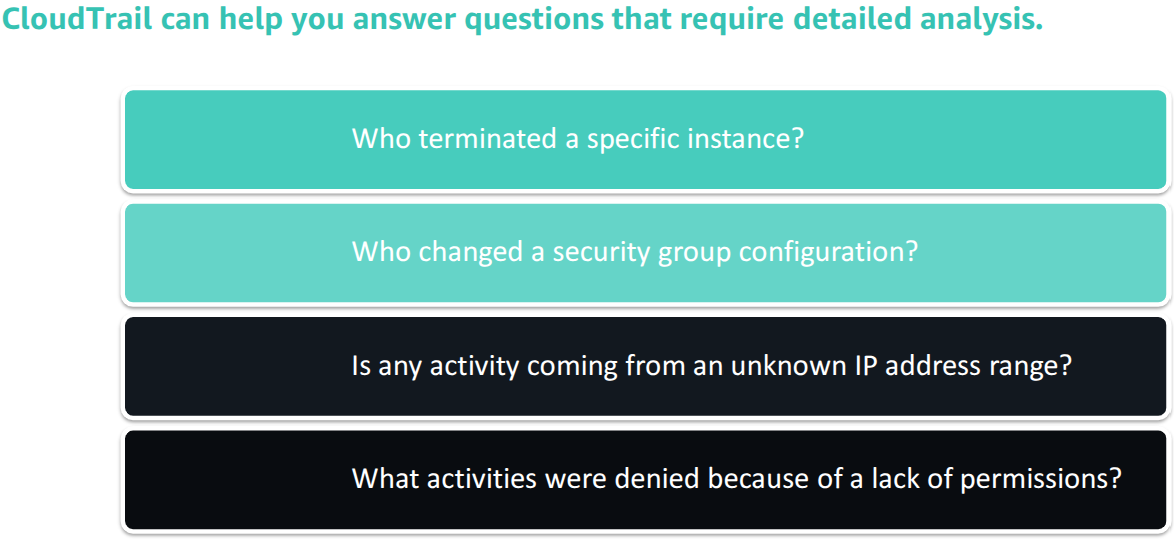

## Configure a Trail

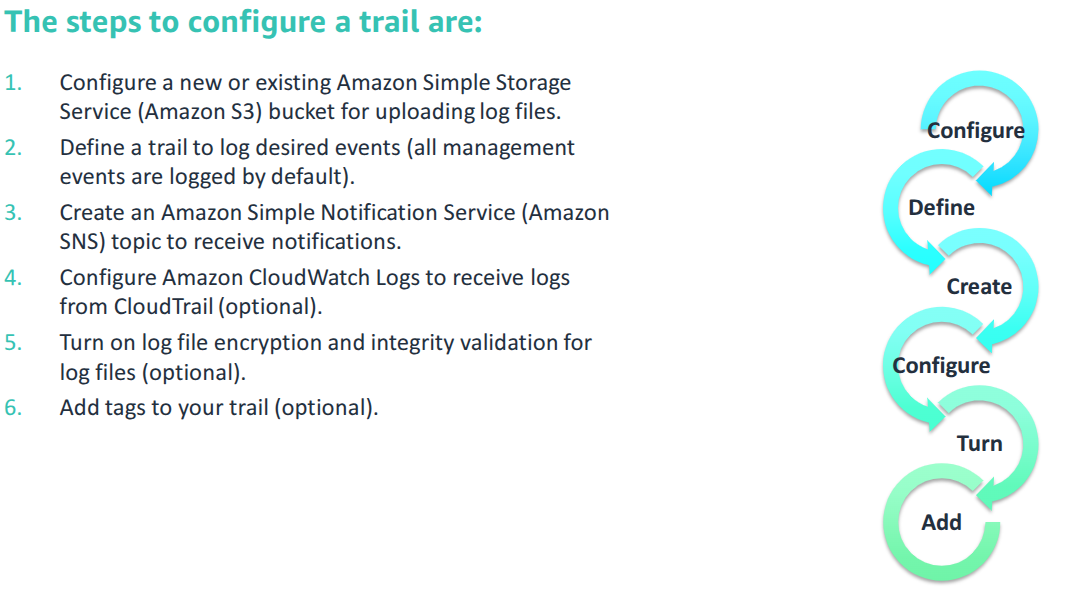

## CloudTrail log entry: `requestParameters`

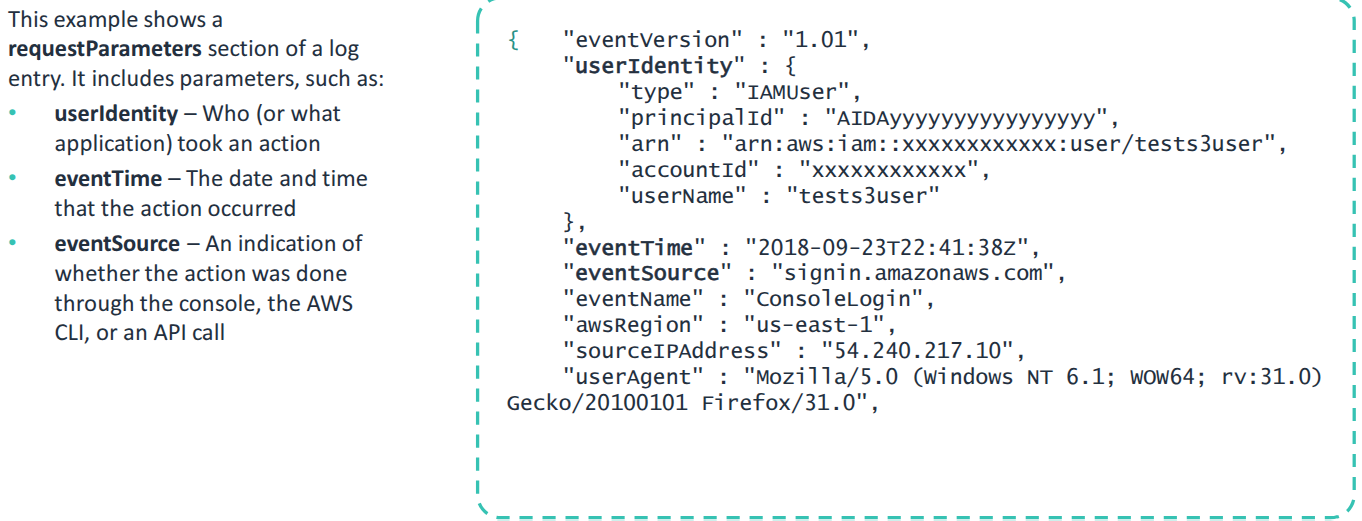

## CloudTrail log entry: `responseElements`

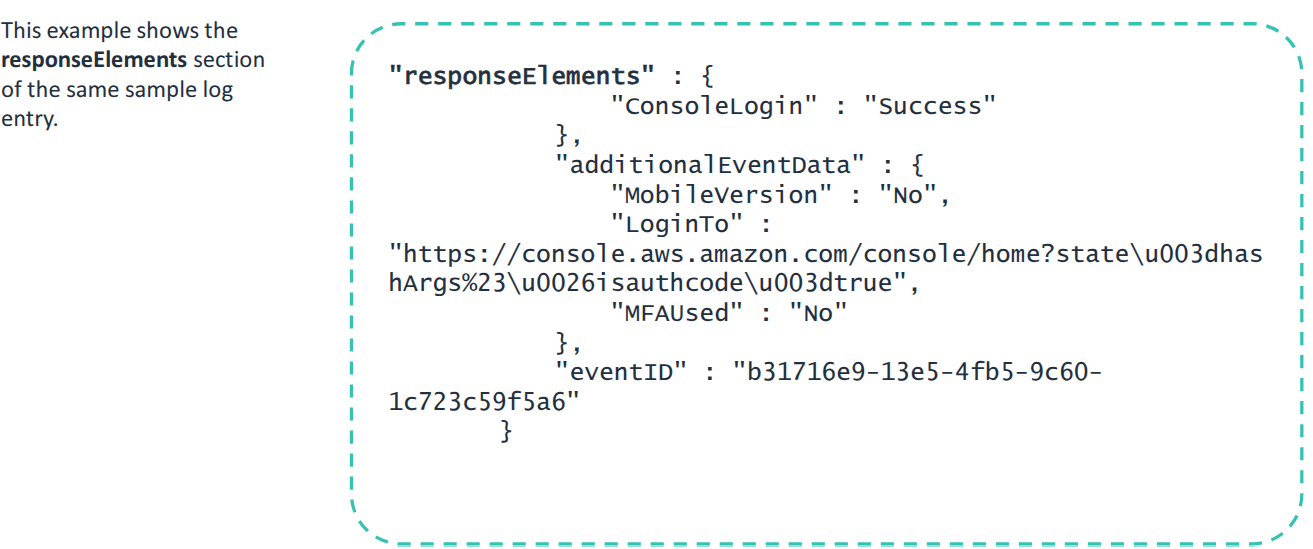

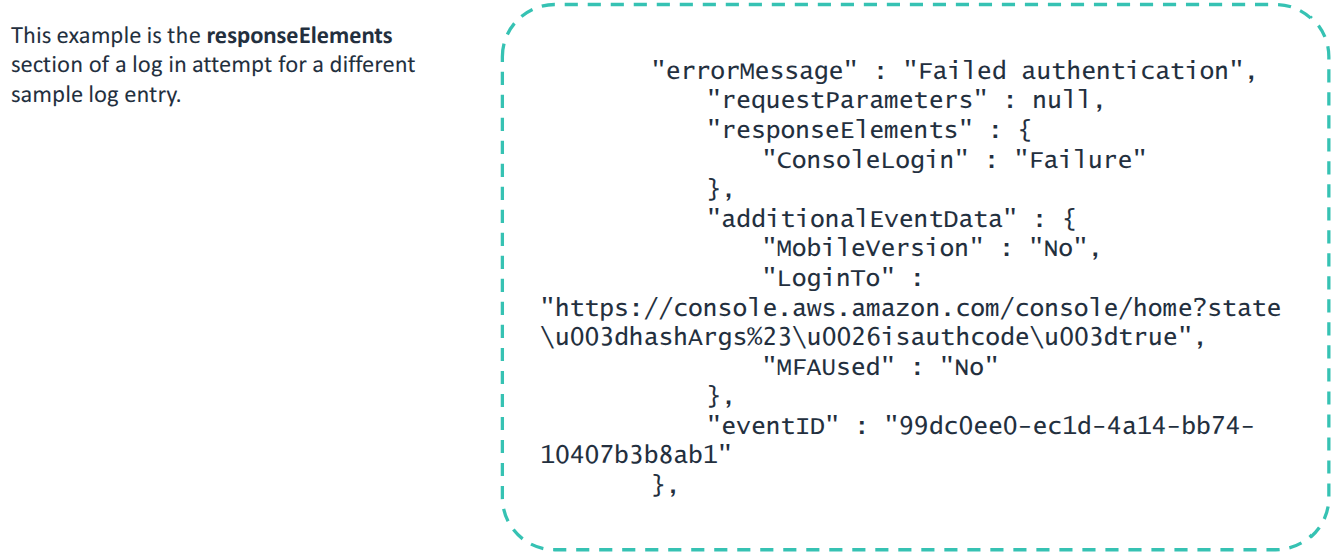


# Lab 187 - Working with AWS CloudTrail

## Modifying a security group and observing the website

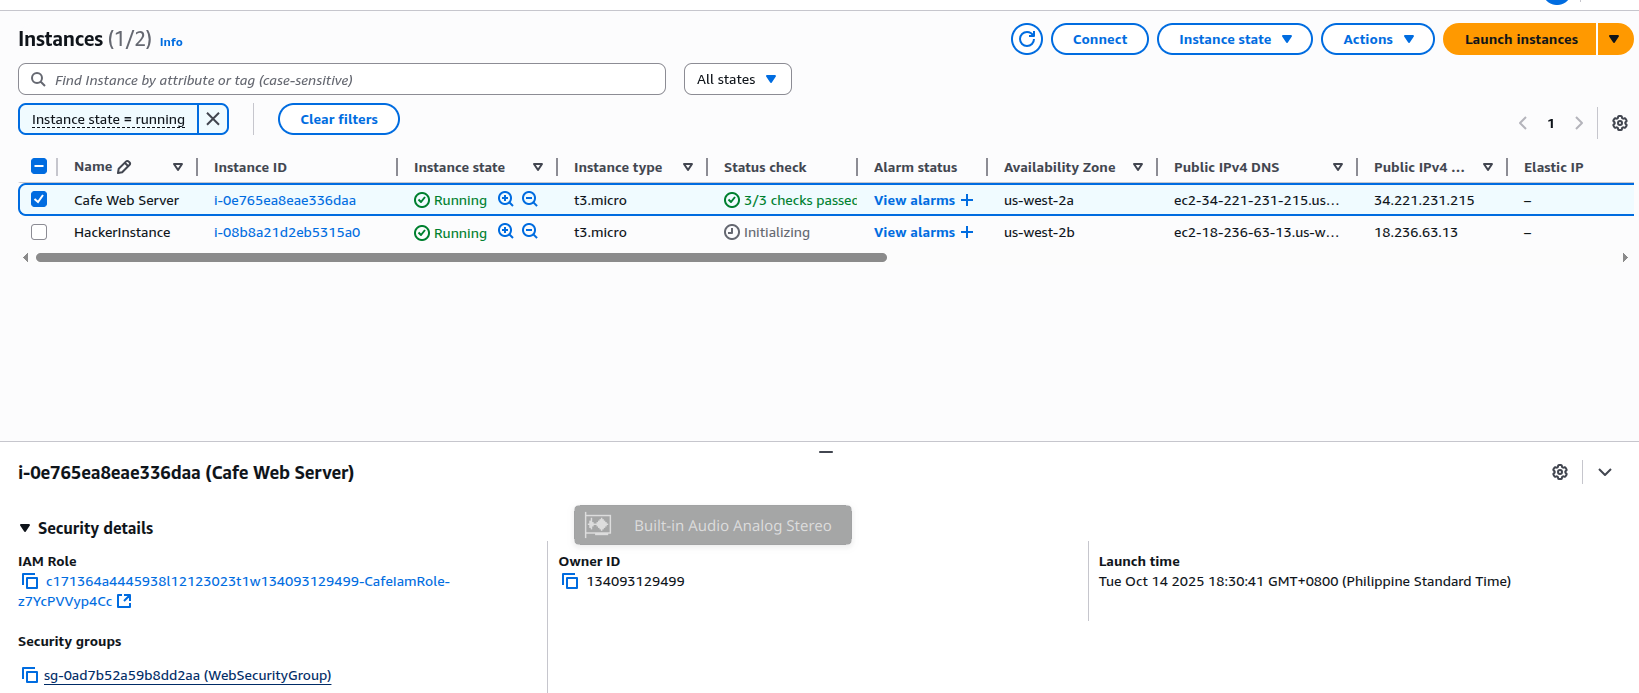

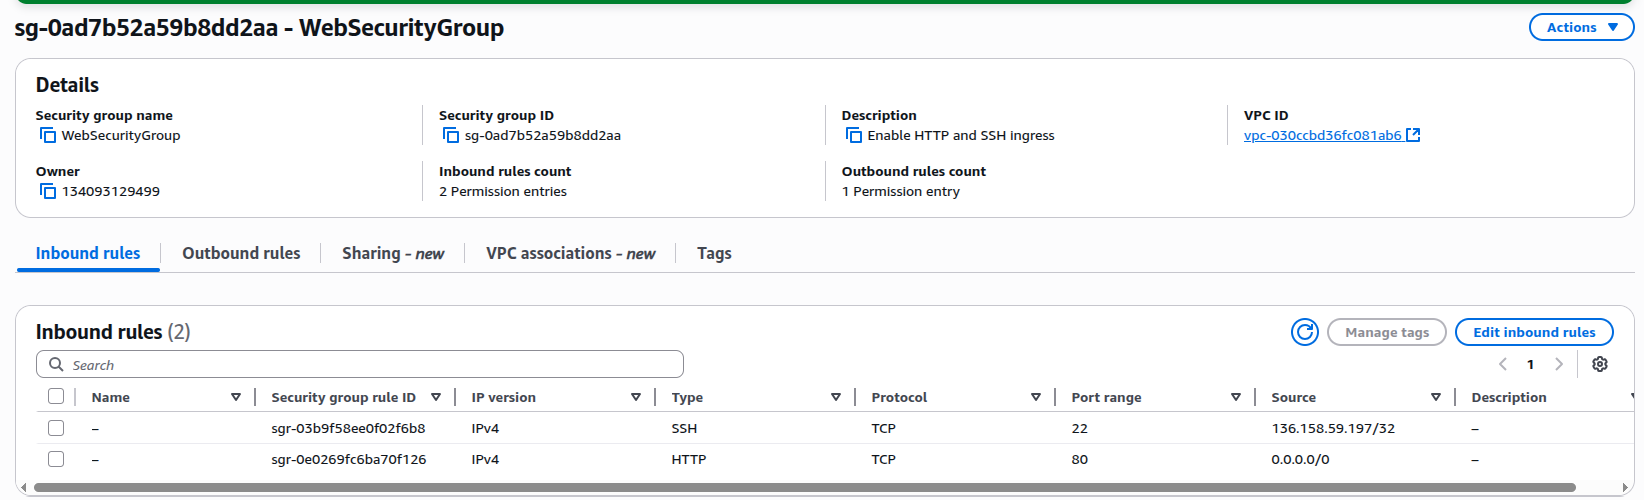

Afterwards, you can access the website. in the next task, it is implied that the website isi hacked

## Creating a CloudTrail log and observing the hacked website

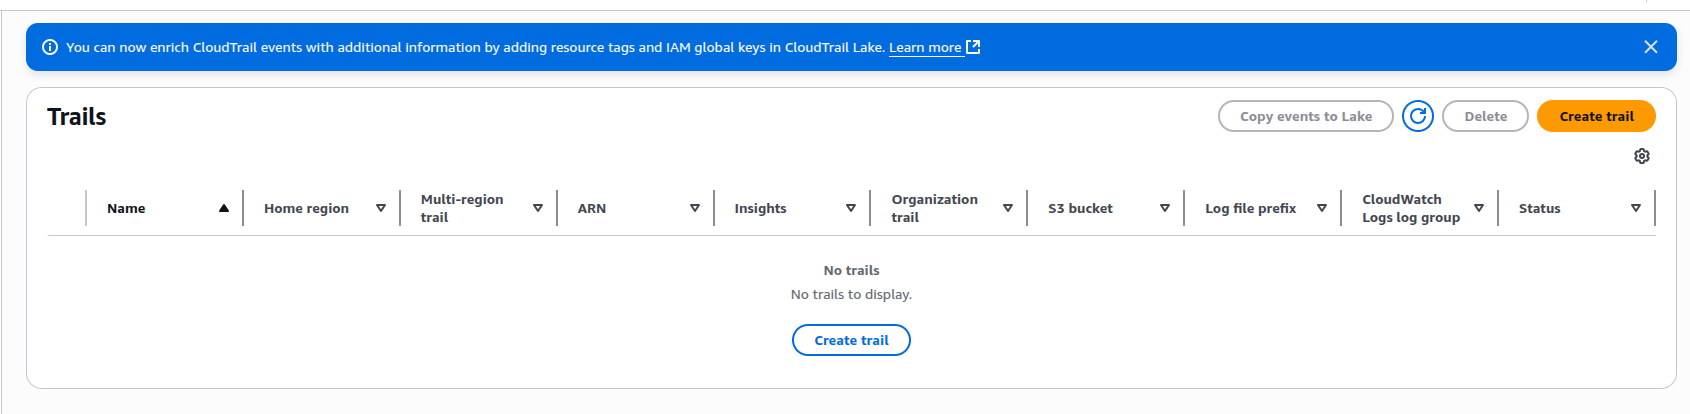

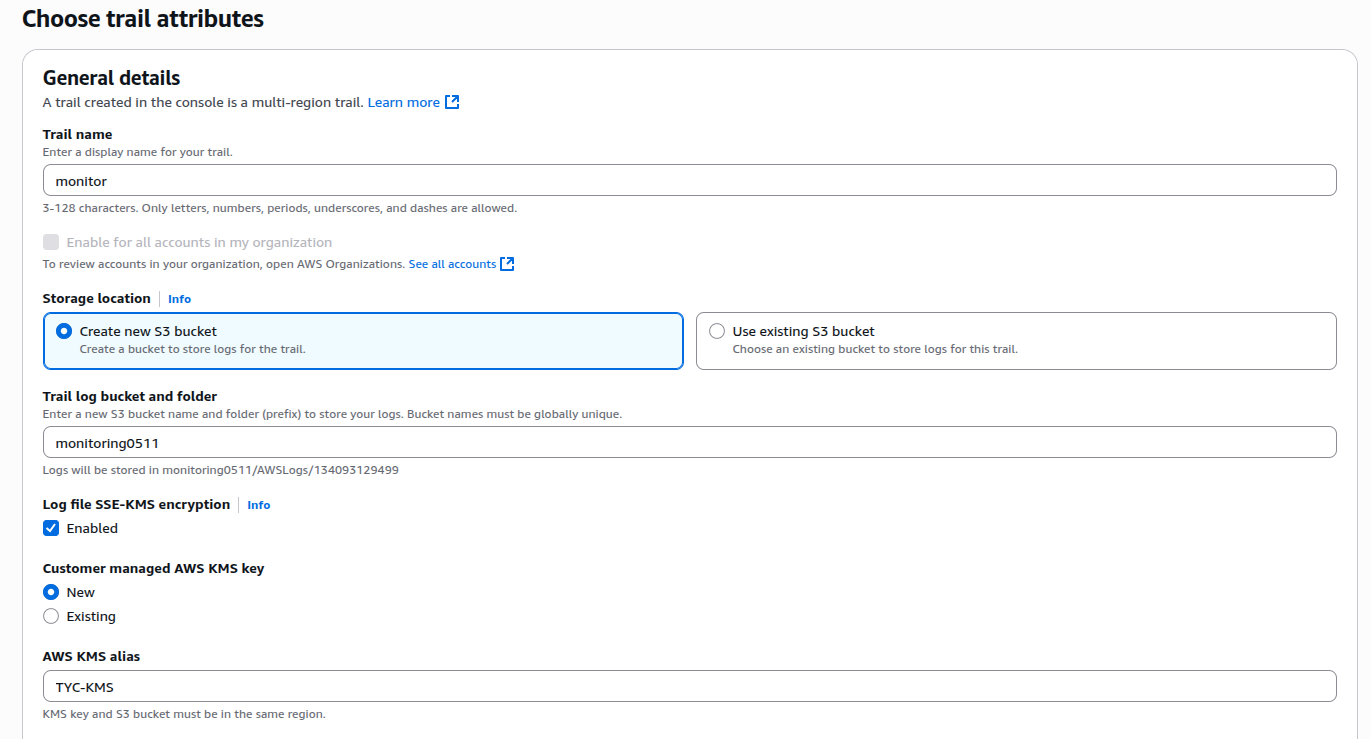

The hacked website:

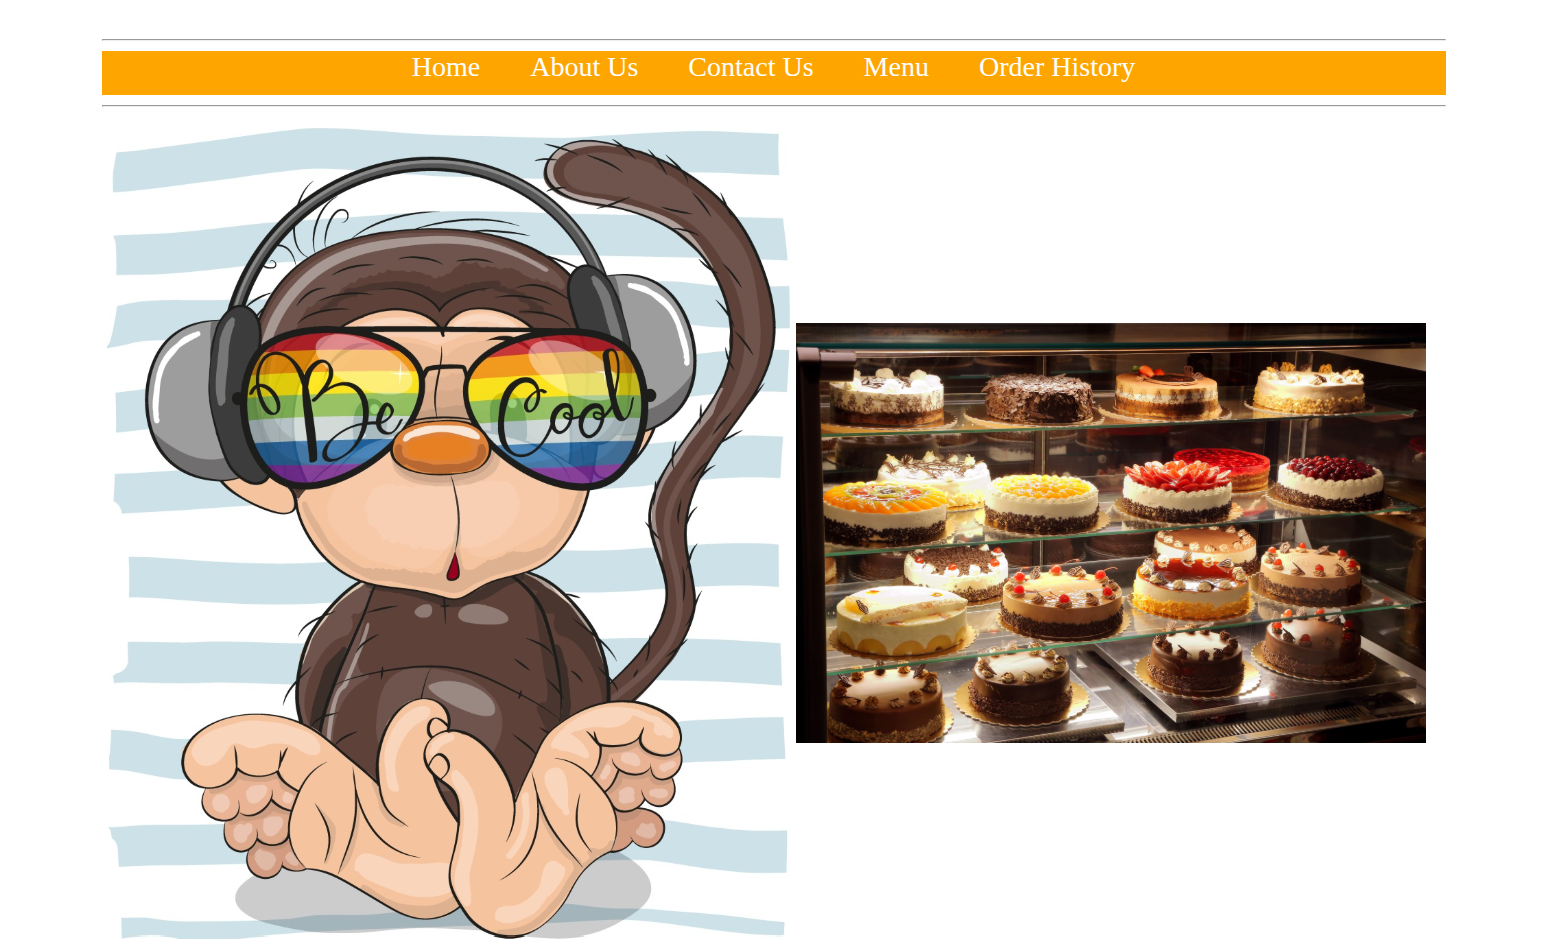

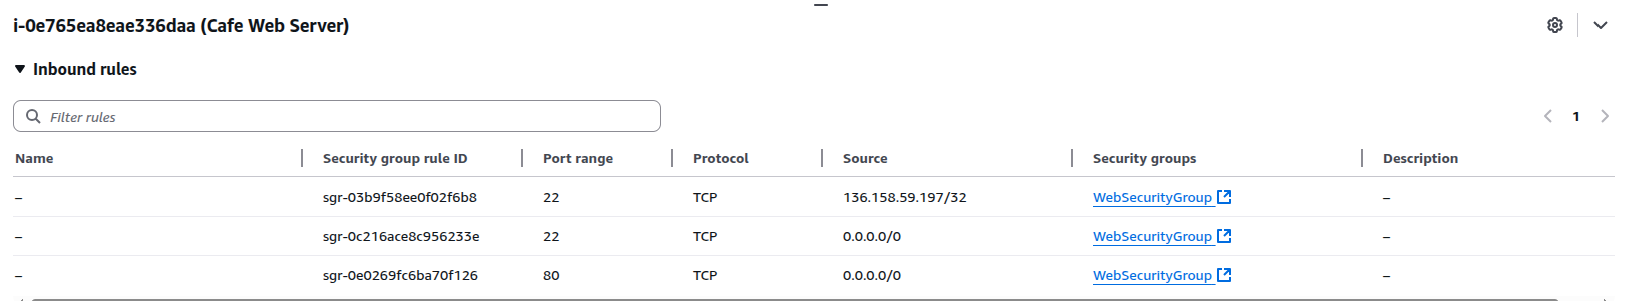



## Analyzing CloudTraiil Logs

### Via the AWS CLI

- Return all cloud trail logs

    ```bash
    cat <filename.json> | python -m json.tool
    ```

- Looping with `grep`

    ```bash
    for i in $(ls); do echo $i && cat $i | python -m json.tool | grep sourceIPAddress ; done 
    for i in $(ls); do echo $i && cat $i | python -m json.tool | grep eventName ; done # same but returns eventName instead of source IP
    ```
- Via the CloudTrail CLI:

    ```bash
    aws cloudtrail lookup-events --lookup-attributes AttributeKey=EventName,AttributeValue=ConsoleLogin
    ```
- Find the security group ID

    ```bash
    region=$(curl http://169.254.169.254/latest/dynamic/instance-identity/document|grep region | cut -d '"' -f4)
    sgId=$(aws ec2 describe-instances --filters "Name=tag:Name,Values='Cafe Web Server'" --query 'Reservations[*].Instances[*].SecurityGroups[*].[GroupId]' --region $region --output text)
    echo $sgId
    ```

- Use the security group ID to further filter

    ```bash
    aws cloudtrail lookup-events --lookup-attributes AttributeKey=ResourceType,AttributeValue=AWS::EC2::SecurityGroup --region $region --output text | grep $sgId
    ```

## Analyzing the CloudTrail logs by using Athena

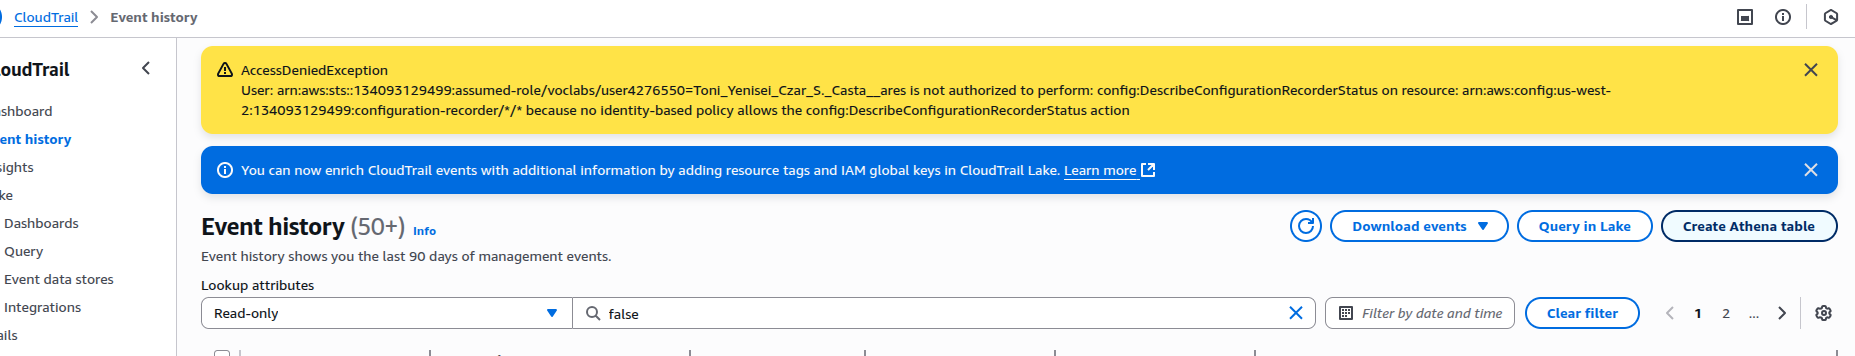

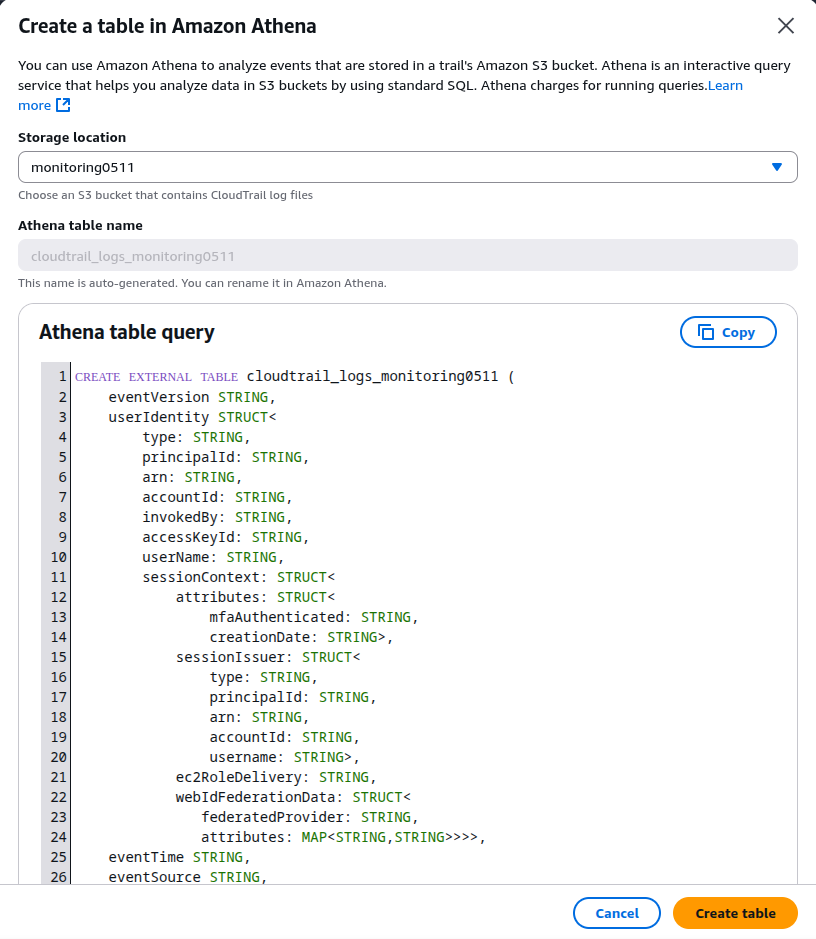

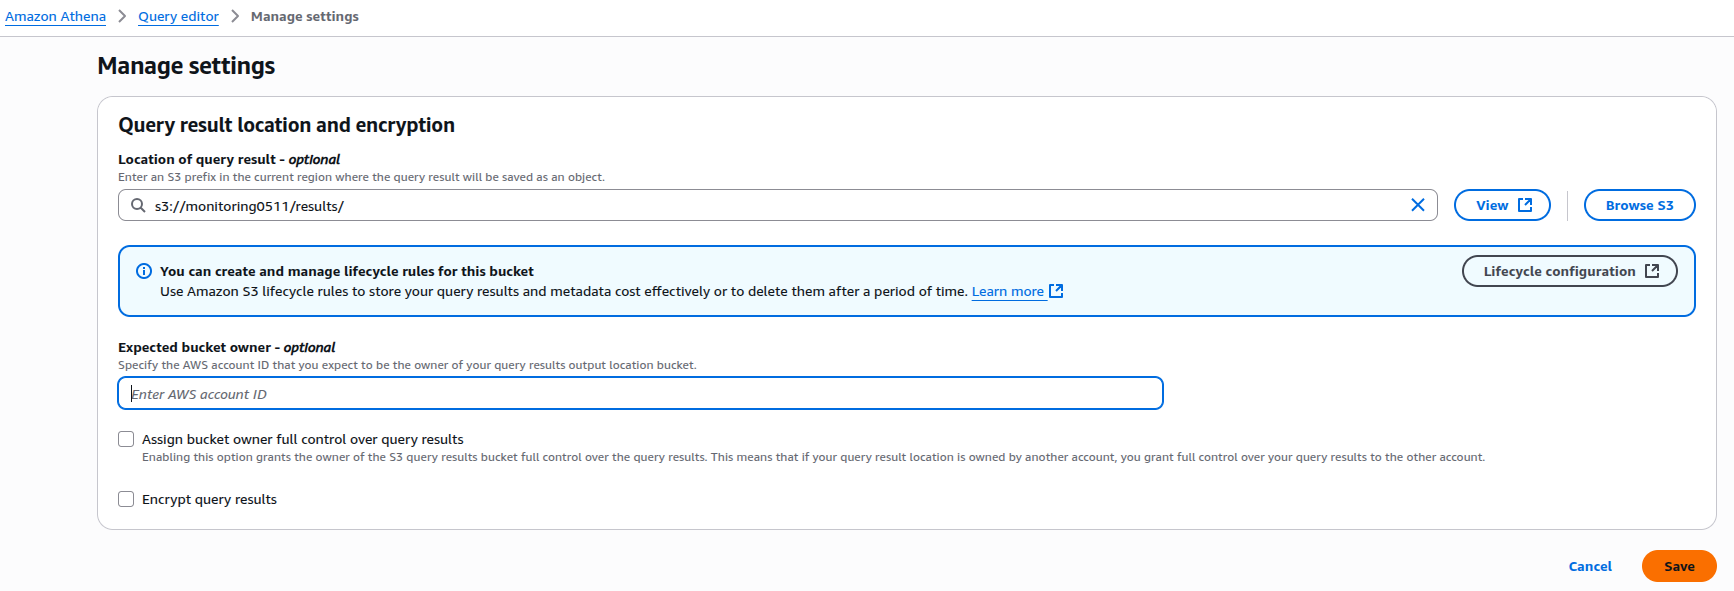

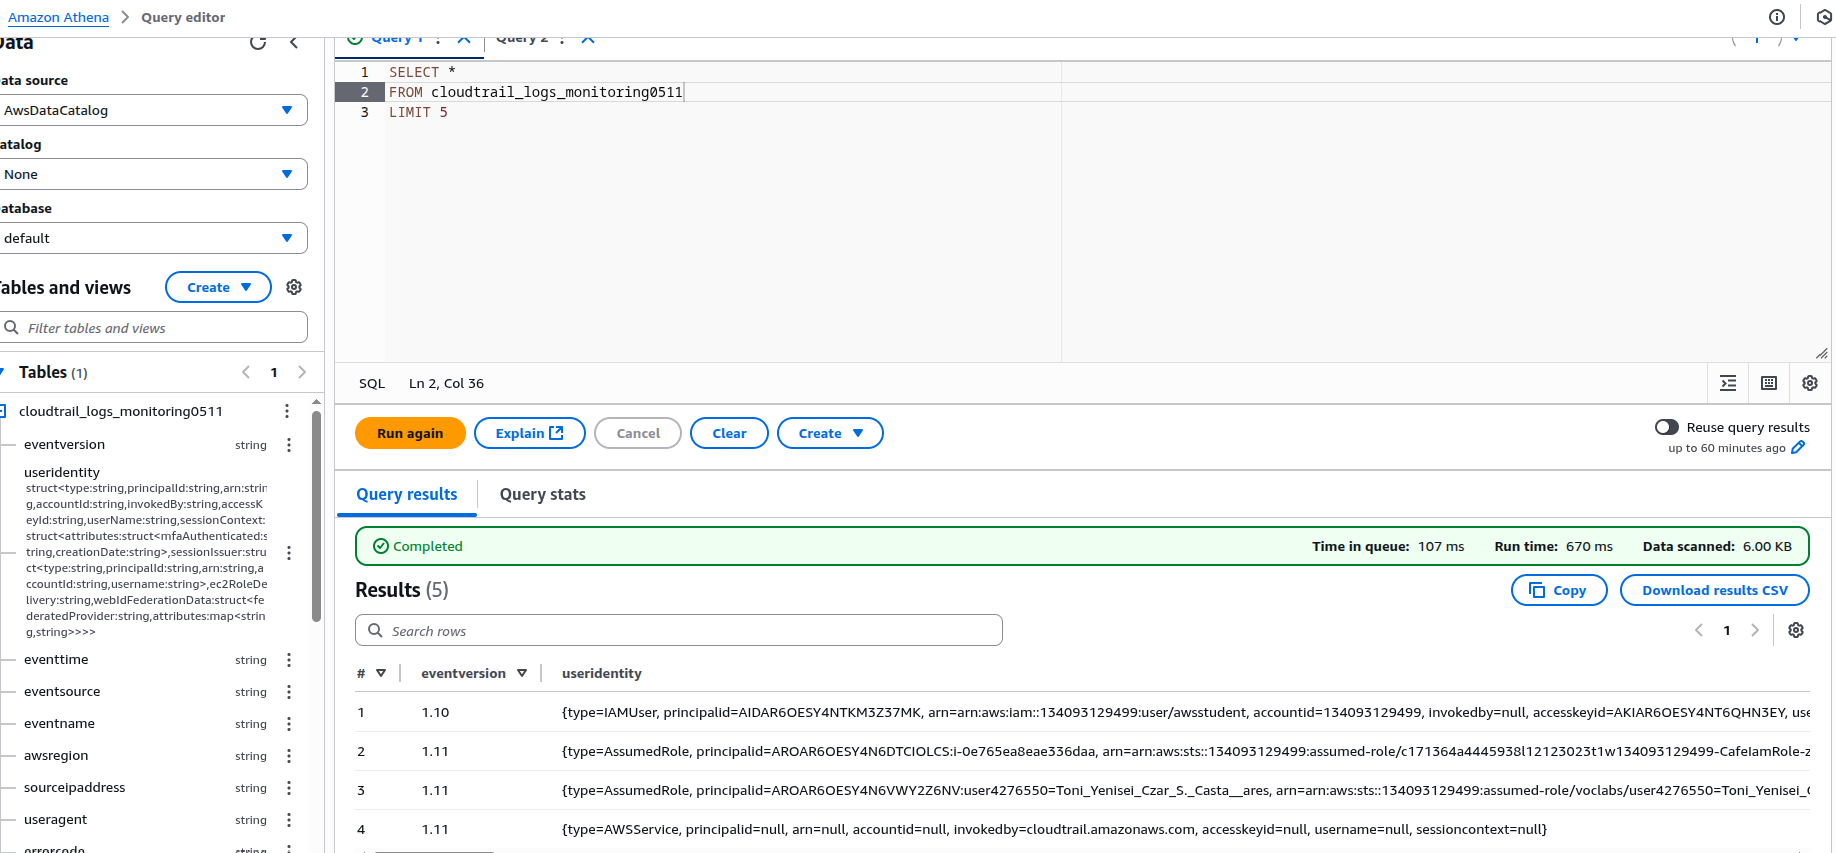

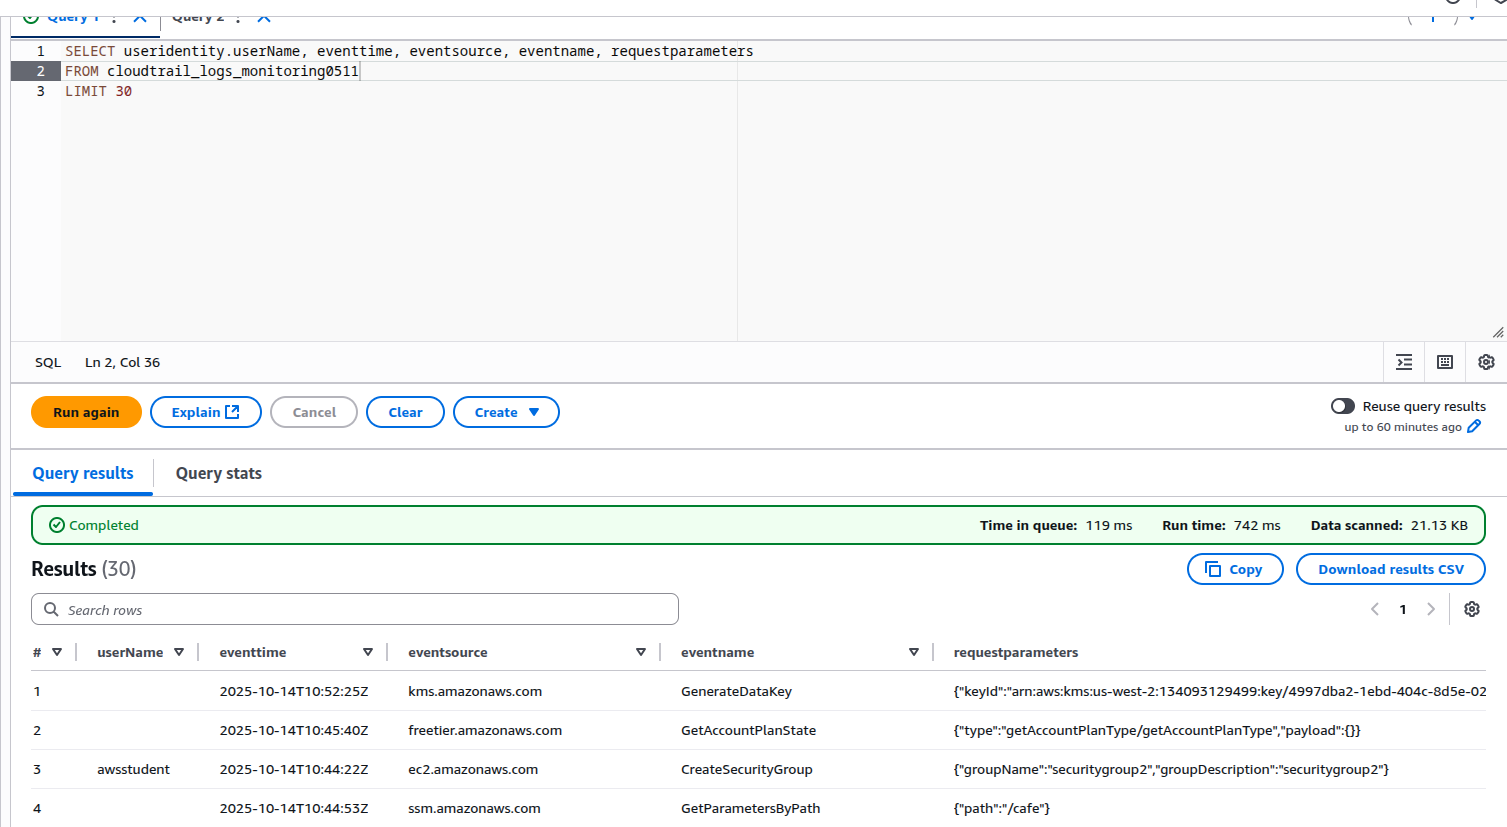

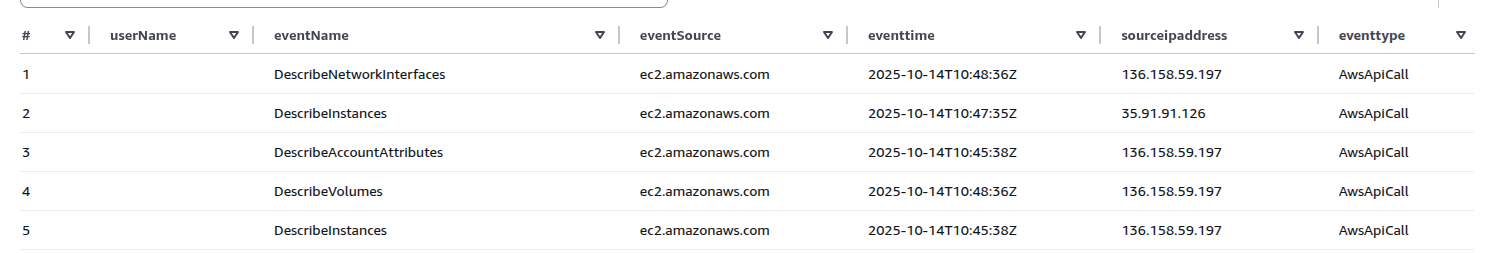

# AWS Service Integration with Amazon Athena

## Amazon Athena

- Handles large scale datasets with ease

- Serverless
- Pay only for queries you run
- Automatically runs queries in parallel
- Works with various formats (JSON, CSV, Optimized Row Columnar, Apache Avro, Apache Parquet)
- Iideal for quick ad hoc querying, but also for complex analysis (large joins and arrays)
- Uses *S3* as its underlying data store (HA and durable)

## Getting Started with Athena

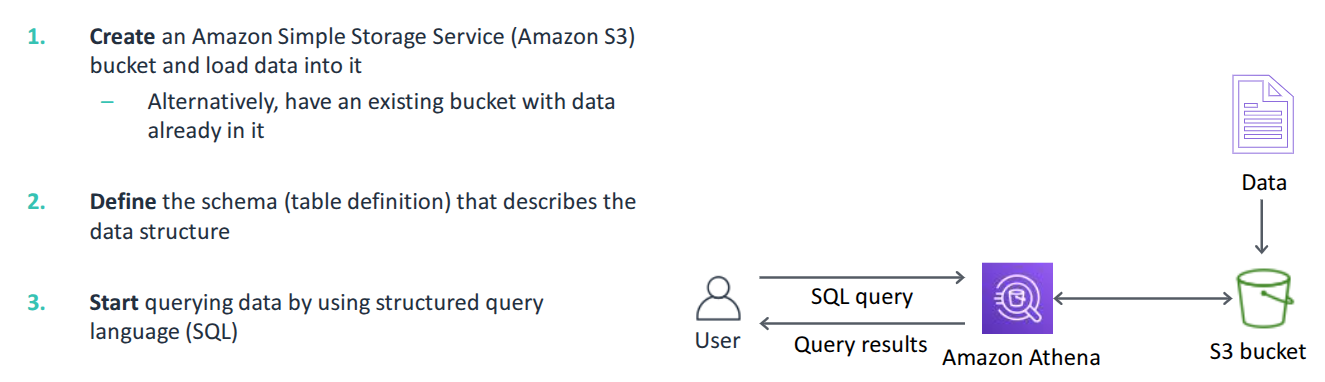

- Integrates well with other services (AWS CloudTrail, Application Load balancer Logs, Amazon VPC Logs)